# 가설검정 : 내가 생각한 시나리오를 테스트하는 것

# 카이제곱 검정(데이터 많을 때 사용)
: 두 범주형 변수가 서로 상관이 있는지 판단하는 통계적 검정 방법.
예) 학력, 성별, 직업의 만족도

### 아동별 장난감 보유 현황
- 귀무가설 : child1과 child2dml 장난감 보유수에 대한 만족도는 차이가 없다. 
- 대립가설 : child1과 child2dml 장난감 보유수에 대한 만족도는 차이가 있다.

In [1]:
# child별 장난감 보유 현황

child1 <- c(5,11,1)
child2 <- c(4,7,3)

In [2]:
# 분석을 위해 데이터 합치기

Toy <- cbind(child1,child2)
Toy

child1,child2
5,4
11,7
1,3


In [3]:
# 장난감 종류
rownames(Toy) <- c("car","truck","doll")
Toy

,child1,child2
car,5,4
truck,11,7
doll,1,3


In [4]:
# 카이제곱 검정 실시

chisq.test(Toy) 

Warning message in chisq.test(Toy):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론

p-value = 0.4219 >0.05(95% 신뢰구간) -> 귀무가설 채택
>child1과 child2의 데이터는 통계적으로 큰 차이가 없다.   
p-values는 0 에 가까울수록 좋다. 미리 정해진 유의수준(일반적으로 0.05)보다 작으면 대립가설을 채택하고 유의수준보다 크면 귀무가설을 채택

In [5]:
cor(child1,child2)

[1] 0.9862414

### 메세지 : 카이제곱의 근사값이 정확하지 않을수도 있다.
- 데이터량이 적은 경우 발생

### 피셔검정 (데이터 적을 때 사용)

In [6]:
fisher.test(Toy)


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


p-value = 0.5165 > 0.05 ---> 귀무가설

---
## t-검정


In [7]:
# 귀무가설 : 건전지의 수명은 1000시간이다.
# 대립가설 : 건전지의 수명은 1000시간이 아니다. 

In [8]:
bat <- c(980,1008,968,1032,1012,1002,996,1017)

In [9]:
# 데이터의 분포가 정규분포인지 확인 --->Shapiro-Wilk 검정을 실시
# 귀무가설 : 자료가 정규분포를 따른다.
# 대립가설 : 자료가 정규분포를 따르지 않는다.

In [10]:
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469


p-value = 0.9469 > 0.05 ---> 귀무가설 ... 데이터는 정규분포를 이룬다

In [11]:
# t-검정 실시
t.test(bat,mu=1000,alternative = "two.sided")

# mu : 비교하는 대상의 평균
# alternative 
# - two.sided : 데이터가 평균과 다르다
# - greater : 데이터가 평균보다 크다
# - less : 데이터가 평균보다 적다


	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


p-value = 0.8032 > 0.05 ---> 귀무가설 : 건전지의 수명은 1000시간이다

---

In [16]:
exam <- read.csv("./Data/exam.csv")
head(exam)

no,score
1,58
2,49
3,39
4,99
5,32
6,88


[1] 56.17647

In [19]:
# 어떤 학급의 수학 점수 평균 : 55점
# 0교시 수업을 한 후에 학생들의 성적이 올랐을까?
# 귀무가설 : 성적이 오르지 않았다.
# 대립가설 : 성적이 올랐다.

# 정규 분포 확인
shapiro.test(exam$score)


	Shapiro-Wilk normality test

data:  exam$score
W = 0.91143, p-value = 0.1058


p-value = 0.1058 > 0.05 ---> 정규분포

In [21]:
summary(exam$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   42.00   55.00   56.18   62.00   99.00 

In [22]:
t.test(exam$score,mu=55,alternative = "greater")


	One Sample t-test

data:  exam$score
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


p-value = 0.4046 > 0.05 --> 귀무가설 ---> 성적이 오르지 않았다

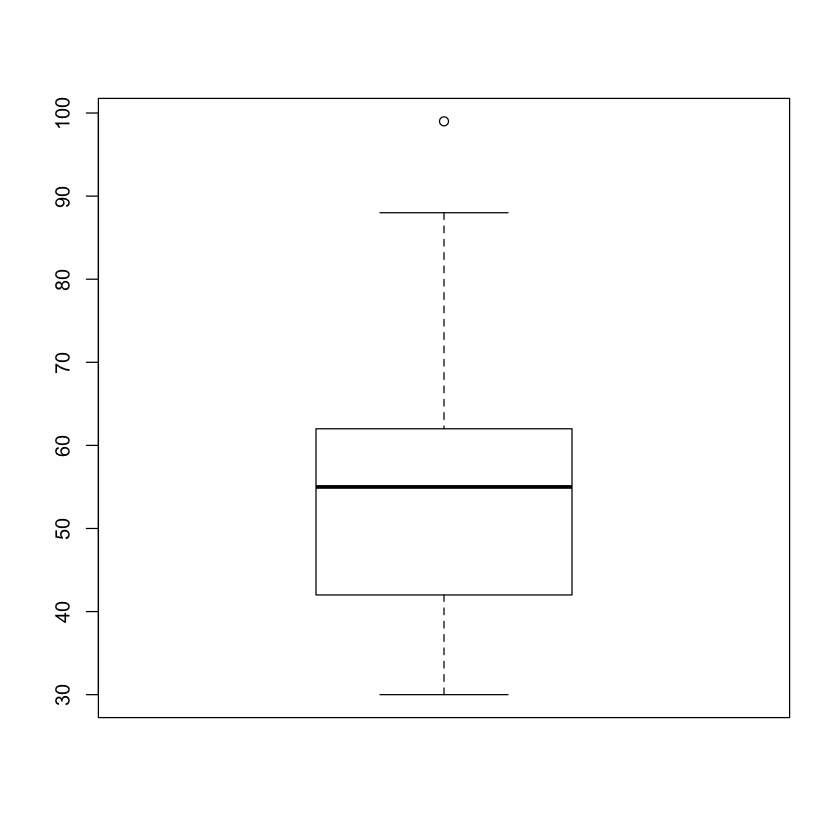

In [23]:
boxplot(exam$score)

---

In [24]:
# 표본이 2개인 t검정
# 신약개발했는데 복용 전후 차이가 있는지 분석하기
# 귀무가설 : 복용 전후의 차이가 없다.
# 대립가설 : 복용 전후의 차이가 있다.

In [25]:
preMedicine <- read.csv("./Data/preMedicine.csv")
postMedicine <- read.csv("./Data/postMedicine.csv")

In [26]:
pre <- preMedicine$data
post <- postMedicine$data

In [27]:
t.test(pre,post,alternative = "two.sided")


	Welch Two Sample t-test

data:  pre and post
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


In [ ]:
p-value = 0.7165 > 0.05 ---> 귀무가설 : 약효가 없다
# 통계로 쓰이는 데이터는 절대로 순서를 바꾸면 안됨
# 평균을 보면 복용 전후 평균값이 증가하여 약효가 있는 것처럼 보이지만
# t-검정에 의한 p-value를 보면 약효가 없는걸 알수있음

---
# 상관계수

In [30]:
y <- c(1,2,3,4)
z <- c(0,7,5,9)

cor(y,z)

[1] 0.8356578

In [31]:
# 피어슨 상관계수
# cor() method의 기본설정

cor(y,z,method = "pearson")

[1] 0.8356578

In [32]:
# 스피어맨 상관계수
# 데이터가 5개를 넘지않을 경우, spearman으로 하는게 맞음

cor(y,z,method = "spearman")

[1] 0.8

---

 ## 콜모고로프-스미노프 검정(KS Test)
: 주어진 2개의 데이터가 같은 분포를 이루는지 검정하는 것.

In [35]:
# 귀무가설 :두개의 데이터의 분포가 다르다
# 대립가설 : 두개의 데이터의 분포가 같다

In [36]:
x <- rnorm(50) # rnorm() 정규분포 만드는 함수
y <- runif(50)

ks.test(x,y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.52, p-value = 1.581e-06
alternative hypothesis: two-sided


p-value = 1.581e-06 < 0.05 ---> 대립가설

---

## 부호검정
: 2개의 데이터 사이에 차이가 있는지 검정하는것

In [40]:
# 식사 전과 식사 후의 음료수 맛에 대한 평가

x <- c(4,1,1,4,3,3,2,5,3,3) # 식사 전의 음료수 맛에 대한 평가점수
y <- c(1,1,3,2,5,1,4,4,3,1) # 식사 후의 음료수 맛에 대한 평가점수

In [41]:
# 귀무가설 :유의한 차이가 없다.
# 대립가설 :유의한 차이가 있다.

In [46]:
binom.test(c(length(x[x>y]),length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


p-value = 0.7266 > 0.05 ---> 귀무가설

---
## 비율 검정
: 2개의 데이터 사이에 비율이 차이가 있는지에 대한 것을 검정

In [48]:
# 맥주를 좋아하시나요? 라는 질문에 서울에서는 400명 중 360명, 부산에서는 200명 중 136명이 좋아한다고 답했다며
# 둘의 비율 차이가 있다고 할 수 있는가?

# 귀무가설 : 유의한 차이가 없다.
# 대립가설 : 유의한 차이가 있다.

hite <- c(360,136)
sample <- c(400,200)

prop.test(hite,sample)


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 4.207e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


p-value = 4.207e-11 < 0.05 ---> 대립가설 : 유의한 차이가 있다. *p-value : 유의수준